## BigMart Sales Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import Raw Data

In [2]:
df=pd.read_csv("BigMart_sales.csv") # read the data

1. Identify the number of rows and columns

In [3]:
df.shape
#There are 8523 rows and 12 colums

(8523, 12)

2. How many colums are there and a brief description on each

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### column description
- Item identifier : A key column to identify each column
- Item_weight : Weight of item content
- Item_Fat_Content : Fat content in the items where it is low fat or regular fat
- Item_Visibility : The % of the total display area in a store allocated to the particular product
- Item_MRP : MRP of the items
- Outlet_Identifier : A key column to identify each outet was location
- Outlet_Establishment_Year : year when the  outlet was established
- Outlet_Size : The size of the outlet
- Outlet_Location_Type : The type of outlet:Grocery or supermarkets: whether it is 'Tier 1', 'Tier 3', 'Tier 2'.
- Item_Outlet_Sales :Total sales of the items in each outlet(The target in study)

#### Problem Statement :
- Analyze the data and understand the factors impacting the sales in each outlet
- Identify the anomilies and trends in the data using charts and visuals
- Handle missing values and outliers with appropriate techniques and clean the data

### Understanding the data
- Check for missing values and their distribution across variables, as missing data can significantly
affect the quality and reliability of your analysis.
- Identify the data types and formats for each variable, as this information is essential for subsequent
data manipulation and analysis steps.
- Look for any obvious errors or inconsistencies in the data, such as invalid values, mismatched units,
or outliers, which could indicate data quality issues.

In [67]:
# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price per Weight             0
MRP_Categories               0
Item_Category                0
dtype: int64

Missing values are found in item_weight colum(1462 as a count and 17%) and outlet size(2410, approx 28%) Mising data can significantly affect the quality and reliability of our analysis and therefore needs to be handled during the process

- Identify the data types and formats for each variable, as this information is essential for subsequent data manipulation and analysis steps.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. The categorical columns are : Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type
2. Numerical Columns : Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

- Check for duplicate records, inconsistencies in the data

In [7]:
df.duplicated().sum() # there are no duplicates found

np.int64(0)

In [8]:
categorical_columns = df.select_dtypes(include = "object").columns # to create a subset of a categorical features
numerical_columns = df.select_dtypes(include = ["int64, float64"]).columns # to create a subset of numerical features

In [9]:
for cat in categorical_columns:
    print(f"Unique calues and their counts in {cat}")
    print(df[cat].value_counts())
    print("******************************")

Unique calues and their counts in Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64
******************************
Unique calues and their counts in Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
******************************
Unique calues and their counts in Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood               

In [10]:
## Data in columns fat content has to be fixed : Concert LF and Low fat to Low Fat, and reg to Regular
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"})

In [63]:
# Check frequency distribution of values in the 'Item_Fat_Content' column
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [12]:
## Combine all supermarket types under one supermatket
df["Outlet_Type"]=df["Outlet_Type"].replace({"Supermarket Type1":"Supermarket",
                                             "Supermarket Type2":"Supermarket",
                                             "Supermarket Type3":"Supermarket"})

In [13]:
df["Outlet_Type"]=df["Outlet_Type"].replace({"Supermarket Type":"Supermarket"})

In [14]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket      7440
Grocery Store    1083
Name: count, dtype: int64

### Handle Missing Data

In [66]:
# Checking the number of missing values in each column of the dataframe
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price per Weight             0
MRP_Categories               0
Item_Category                0
dtype: int64

In [64]:
# Calculating mean and median of the 'Item_Weight' column to understand central tendency
df["Item_Weight"].mean(), df["Item_Weight"].median()

(np.float64(12.81341957057374), 12.6)

In [18]:
# Finding the most frequently occurring value(s) in the 'Outlet_Size' column (mode)
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [19]:
## Median Imputation for item_weight and mode imputation for outlet_size
df.fillna({'Item_Weight' : df["Item_Weight"].median(),"Outlet_Size": df["Outlet_Size"].mode()[0]}, inplace = True)

In [65]:
# Again Checking the number of missing values in each column of the dataframe
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price per Weight             0
MRP_Categories               0
Item_Category                0
dtype: int64

#### Perform **Univariate Analysis** with distribution plots/countplots
- Univariate analysis is the simplest form of data analysis. It involves analysing data with only one variable to understand its distribution, central tendency, and dispersion

In [62]:
### Distribution plots for numerical columns
for num in numerical_columns:
    if num != "Outlet_Establishment_Year":
        sns.displot(data=df, x=num, bins=15, height=3, aspect=2, kde=True)
        plt.axvline(df[num].mean(),label = "mean", c="red")
        plt.axvline(df[num].median(),label = "mean", c="green")
        plt.title(f'Distribution plot of {num}')
        plt.legend()
        plt.show()

- Item outlet sales and item visibility is posititvey skewed
- Not a clear pattern is visible in item_weight and item_mrp, the data seems symmetrical in item weight
- Majority of the weights are ar0und 12 units
- MRP value seems to follow Uniform Distribution

In [22]:
# Create countplot for all categorical colums including establishment year

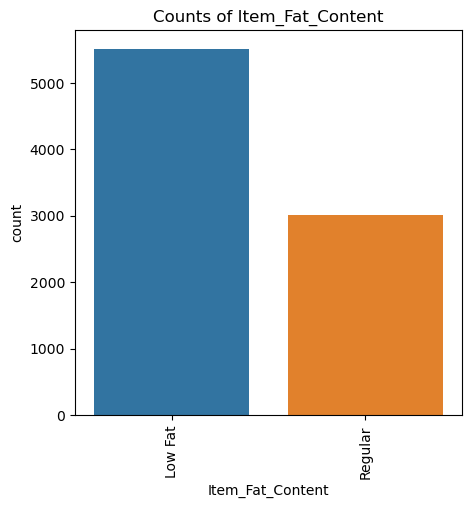

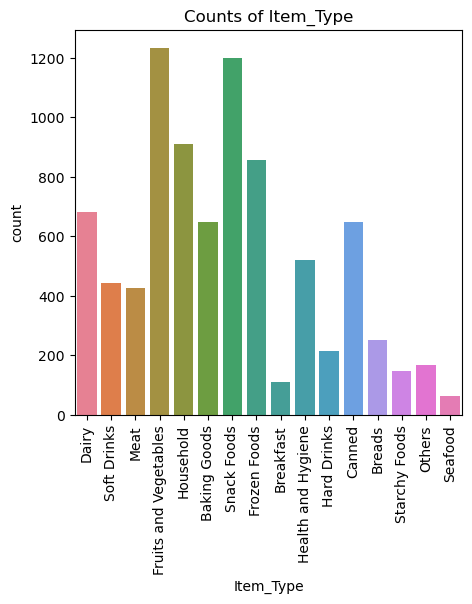

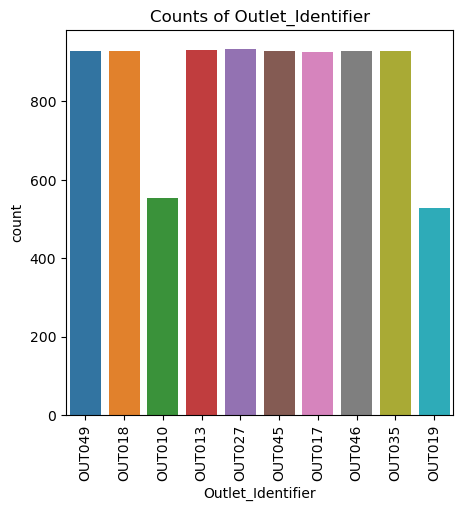

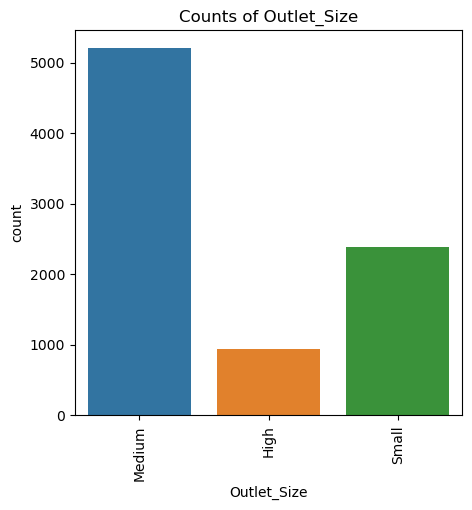

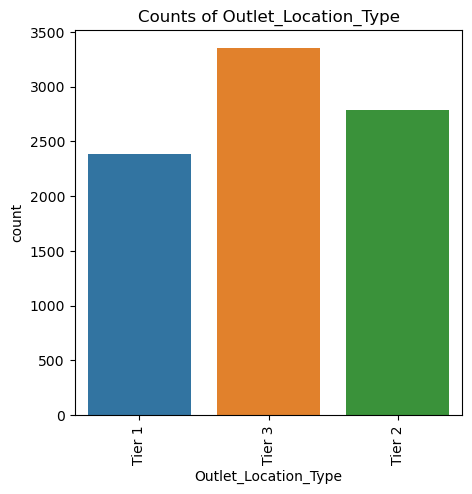

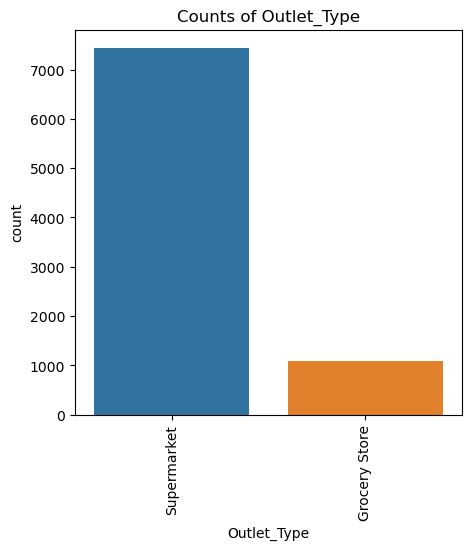

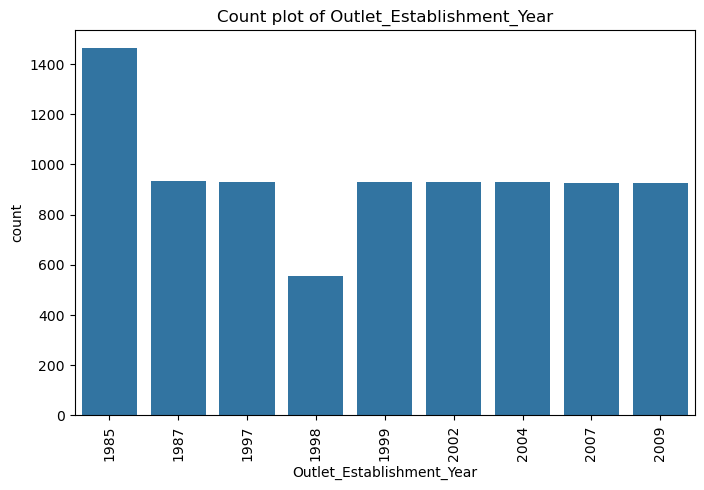

In [23]:
for cat in categorical_columns:
    if cat != "Item_Identifier":
        plt.figure(figsize=(5,5))
        sns.countplot(data = df, x=cat, hue = cat)
        plt.title(f'Counts of {cat}')
        plt.xticks(rotation=90)
        plt.show()
plt.figure(figsize=(8,5))
sns.countplot(data = df, x="Outlet_Establishment_Year")
plt.title("Count plot of Outlet_Establishment_Year")
plt.xticks(rotation=90)
plt.show()

- Low Fat items are more in number as compared to Regular
- Fruits and Vegetables and snacks are fast seling items compared to other items types
- Highest number of outiers were established in 1985(Noe a significant growth post 1985)
- Supermarket types is fae higher in count as compared to groceries
- Tier 3 has more number of data points
- Medium oulet size is more frequent as compared to small and large size

#### **Bivariate analysis**
- Examining the relationship between two variables

1. Examine the relationship between 'Item_Weight' and 'Item_Outlet_Sales'

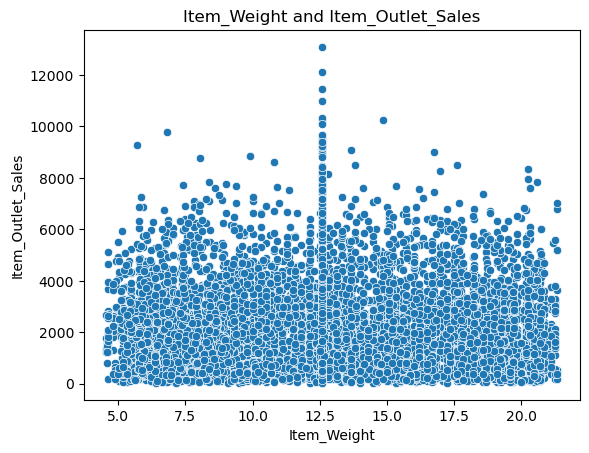

In [24]:
sns.scatterplot(data=df, x= 'Item_Weight', y= 'Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales')
plt.show()

no visible trend or pattern visible

In [25]:
# Box plot for seeing the distribution of sales for thr different fat contents
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

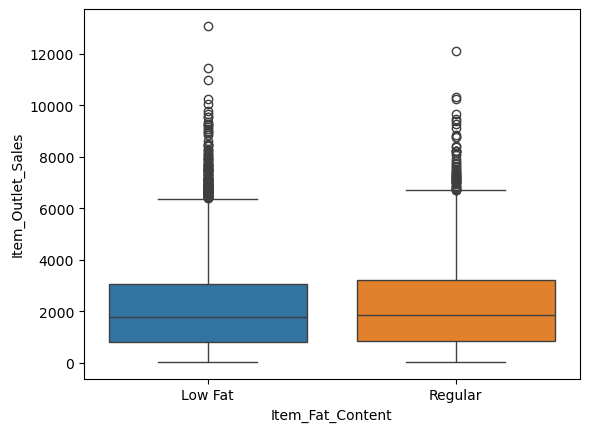

In [26]:
sns.boxplot(data =df, x= 'Item_Fat_Content', y= 'Item_Outlet_Sales', hue='Item_Fat_Content')
plt.show()

- From the above boxplot, the distribution of the sales is almost similar for both types of fat content

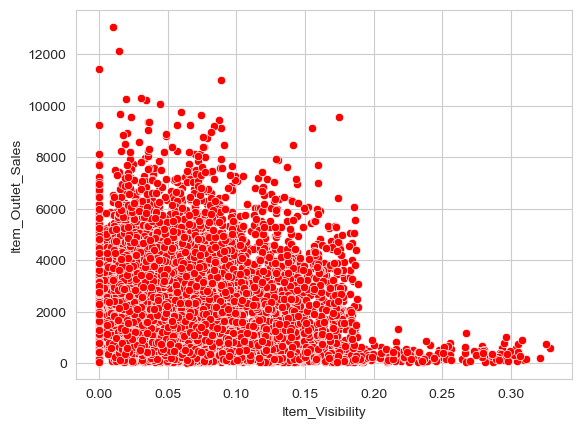

In [68]:
# Scatter plot to visualize relationship between Item_Visibility and Item_Outlet_Sales
sns.scatterplot(data= df, x='Item_Visibility', y='Item_Outlet_Sales', markers = "*", c='r')
plt.show()

- No relationship is captured between the two variables
- Many datapoints have a value of 0 for item visibillity scores, and this needs to be analyzed and handled in further studies

In [28]:
## relatonship betweeen item type and Sales
order=df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).index
order

Index(['Starchy Foods', 'Seafood', 'Fruits and Vegetables', 'Snack Foods',
       'Household', 'Dairy', 'Canned', 'Breads', 'Meat', 'Hard Drinks',
       'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Soft Drinks',
       'Baking Goods', 'Others'],
      dtype='object', name='Item_Type')

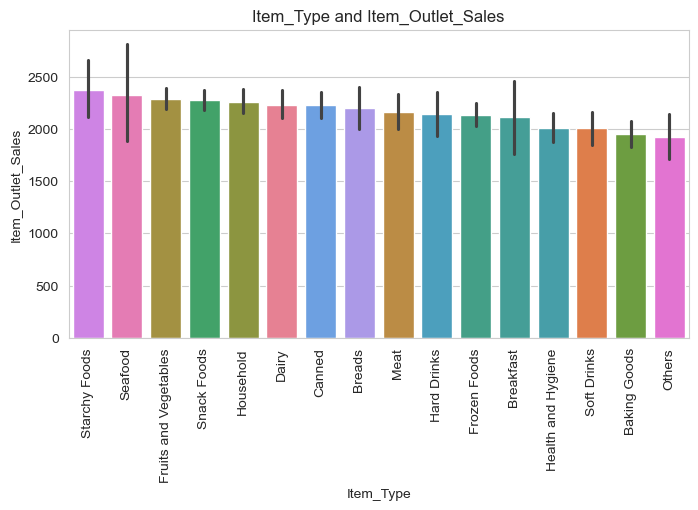

In [69]:
# Bar plot to compare average sales across different Item_Types
plt.figure(figsize=(8,4))
sns.barplot(data= df, x='Item_Type', y='Item_Outlet_Sales', hue= 'Item_Type', order = order)
plt.title('Item_Type and Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

- Average item sales for all item types is between 2000 and 2500
- startchy foods has highest average sales while baking goods and other items have lower sales

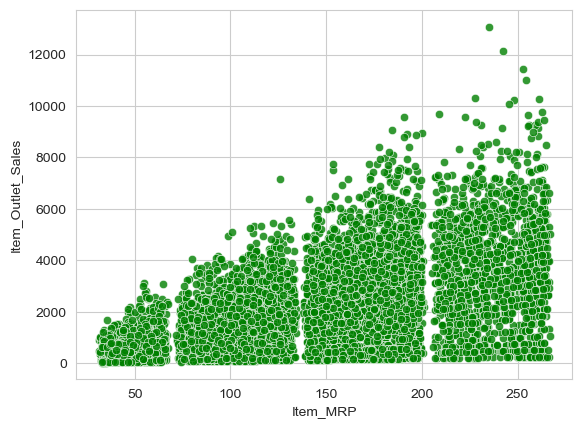

In [70]:
# Scatter plot to visualize relationship between Item_MRP and Item_Outlet_Sales
sns.set_style("whitegrid")
sns.scatterplot(data = df, x= 'Item_MRP', y='Item_Outlet_Sales', c='g', alpha=0.8)
plt.show()

In [71]:
# Get the minimum and maximum values of Item_MRP
df.Item_MRP.min(), df.Item_MRP.max()

(31.29, 266.8884)

In [32]:
# Low MRP : below 70
# Medium MRP : 70 to 140
# High : between 140 to 200
# Very high : above 200

- There seems to be an increasein sales as MRP are getting higher
- We see 4 distinct groups in the datapoints, that can be used to categorize the item MRPs

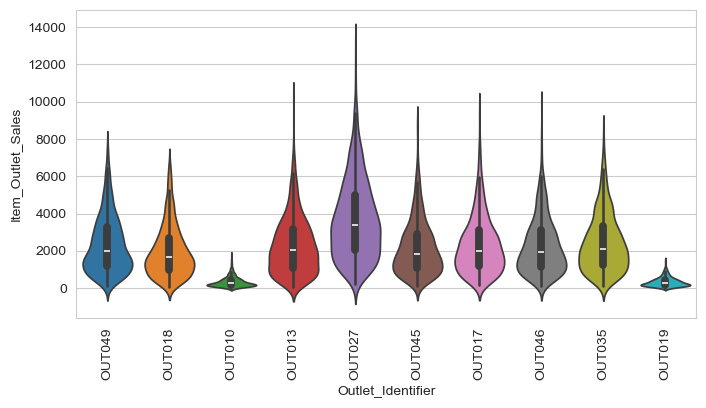

In [72]:
# Violin plot to show sales distribution across different outlets
plt.figure(figsize=(8,4))
sns.violinplot(data= df, x= 'Outlet_Identifier', y='Item_Outlet_Sales',hue='Outlet_Identifier')
plt.xticks(rotation=90)
plt.show()

- The distributions for Outlet 10 and Outlet 19 is distinctly different from others.
- These two outlets have lower sales as compared to others
- Outlet 27 has the largest median sales and has higher sales values

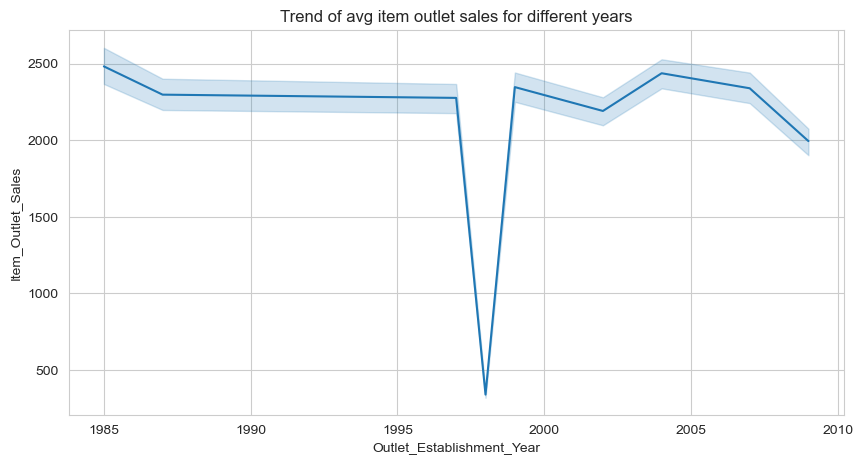

In [73]:
# Line plot showing the trend of average Item_Outlet_Sales by Outlet Establishment Year
plt.figure(figsize=(10, 5))
plt.title("Trend of avg item outlet sales for different years")
sns.lineplot(data = df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.show()

- Sales on an average is between 2000 nd 2500 except for the year 1998 where the sales was less than 500
  

In [74]:
# Get the count of outlets by establishment year, sorted by year
df['Outlet_Establishment_Year'].value_counts().sort_index

<bound method Series.sort_index of Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64>

In [75]:
# Calculate average Item_Outlet_Sales for each Outlet Establishment Year
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [76]:
# Group data by Outlet_Establishment_Year and compute mean, count, min, and max of Item_Outlet_Sales
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg(["mean", "count", "min", "max"])

,mean,count,min,max
Outlet_Establishment_Year,,,,
1985,2483.677474,1463,33.9558,13086.9648
1987,2298.995256,932,73.2380,10256.6490
1997,2277.844267,930,101.8674,9779.9362
1998,339.351662,555,33.2900,1775.6886
1999,2348.354635,930,111.8544,7646.0472
2002,2192.384798,929,99.8700,8994.9580
2004,2438.841866,930,113.8518,8479.6288
2007,2340.675263,926,143.8128,9664.7528
2009,1995.498739,928,69.2432,6768.5228


In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

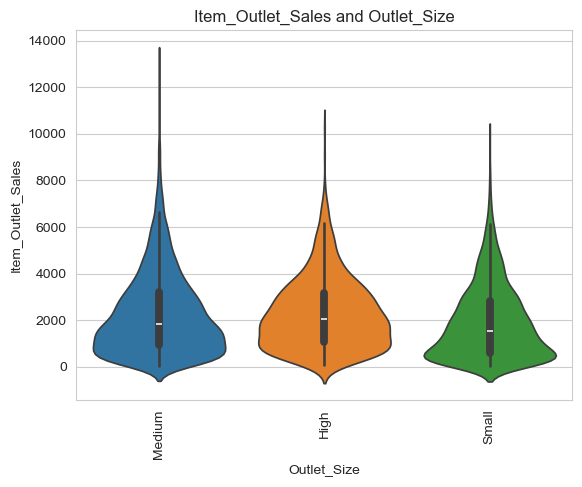

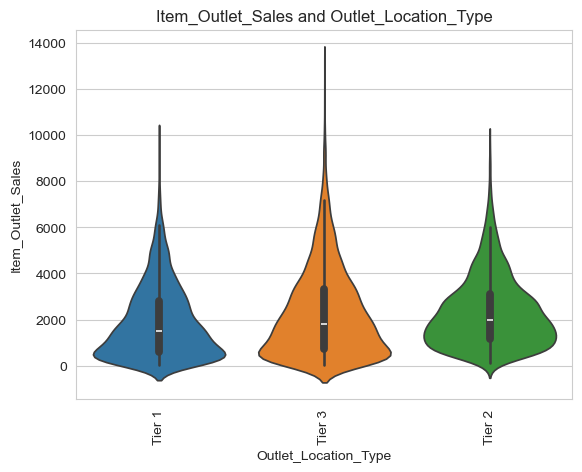

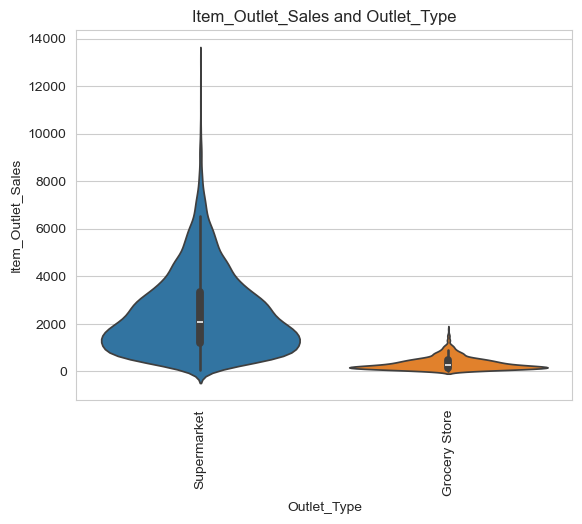

In [77]:
# Plot violin plots to visualize distribution of Item_Outlet_Sales across different categorical features
for col in ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    sns.violinplot(data= df, x=col, y='Item_Outlet_Sales', hue=col)
    plt.xticks(rotation=90)
    plt.title(f'Item_Outlet_Sales and {col}')
    plt.show()

- Sales in small outlet size is a little lower as compared to medium and large outlets
- Tier 3 cities have outliers with higher item_sales and distribution is significanty dfferent, although the median is almost similar
- Grocery stores has significantly lower sales, below 2000 while supermarkets has much larger sales

### Feature Engineering :
Let us proceed with creating the following new columns:
1. Price/unit weight
2. MRP categories - [Low MRP, medium MRP, Very high MRP]
3. Categorize item as - [Healthy-consumable, non healthy consumable, non-cosumable]

In [78]:
# Creating a new feature: Price per Weight (Item_MRP divided by Item_Weight)
df["Price per Weight"]=df['Item_MRP']/df['Item_Weight']

In [79]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price per Weight,MRP_Categories,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,26.861204,Very high,Healthy-Consumable
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,8.153581,Low,Non Healthy Consumable
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,8.092457,High,Healthy-Consumable
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,High,Healthy-Consumable
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,6.031512,Low,Non-Cosumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket,2778.3834,31.248623,Very high,Non Healthy Consumable
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket,549.2850,12.906563,Medium,Non Healthy Consumable
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket,1193.1136,8.030415,Medium,Non-Cosumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket,1845.5976,14.304189,Medium,Non Healthy Consumable


In [42]:
# Low MRP : below 70
# Medium MRP : 70 to 140
# High : between 140 to 200
# Very high : above 200

In [80]:
# Create MRP_Categories column by binning Item_MRP into Low, Medium, High, and Very High price ranges
df["MRP_Categories"]=pd.cut(x=df["Item_MRP"], bins = [31, 70, 140, 200, 270], labels=["Low", "Medium", "High", "Very high"])


In [81]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price per Weight,MRP_Categories,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,26.861204,Very high,Healthy-Consumable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,8.153581,Low,Non Healthy Consumable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,8.092457,High,Healthy-Consumable
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,High,Healthy-Consumable
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,6.031512,Low,Non-Cosumable


In [45]:
# Categorize item as - [Healthy-consumable, non healthy consumable, non-cosumable]
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

- Healthy-Consumable : 'Dairy','Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Seafood'
- Non healthy consumable : 'Soft Drinks', 'Baking Goods','Snack Foods', 'Frozen Foods', 'Hard Drinks', 'Canned', 'Starchy Foods'
- Non-cosumable : 'Household', 'Health and Hygiene', 'Others'

In [82]:
# Function to categorize Item_Type into Healthy-Consumable, Non Healthy Consumable, or Non-Consumable
def cat_items(item):
    if item in ['Dairy','Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Seafood']:
        return 'Healthy-Consumable'
    elif item in ['Soft Drinks', 'Baking Goods','Snack Foods', 'Frozen Foods', 'Hard Drinks', 'Canned', 'Starchy Foods']:
        return 'Non Healthy Consumable'
    else:
        return 'Non-Cosumable'

In [47]:
cat_items("Dairy")

'Healthy-Consumable'

In [83]:
# Apply the cat_items() function to classify Item_Type into Item_Category
df["Item_Category"]=df["Item_Type"].apply(cat_items)

In [84]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price per Weight,MRP_Categories,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,26.861204,Very high,Healthy-Consumable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228,8.153581,Low,Non Healthy Consumable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700,8.092457,High,Healthy-Consumable
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,High,Healthy-Consumable
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052,6.031512,Low,Non-Cosumable


In [50]:
# Price per unit Weight vs Sales

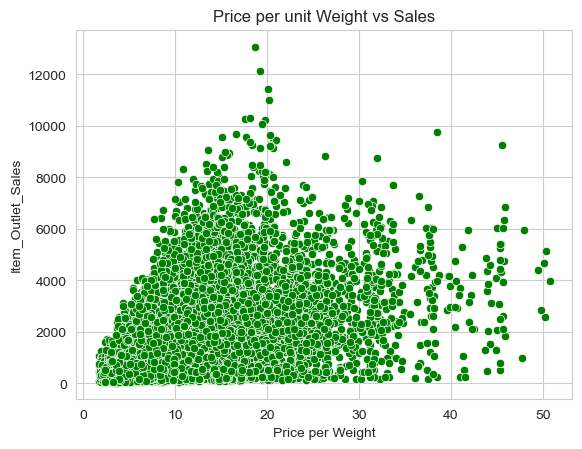

In [85]:
# Scatter plot to analyze the relationship between Price per Weight and Item Outlet Sales
sns.scatterplot(data =df, x= 'Price per Weight', y='Item_Outlet_Sales', c="g")
plt.title("Price per unit Weight vs Sales")
plt.show()

- There seems to be a slight positive correlation between price per weight and item outlet sales

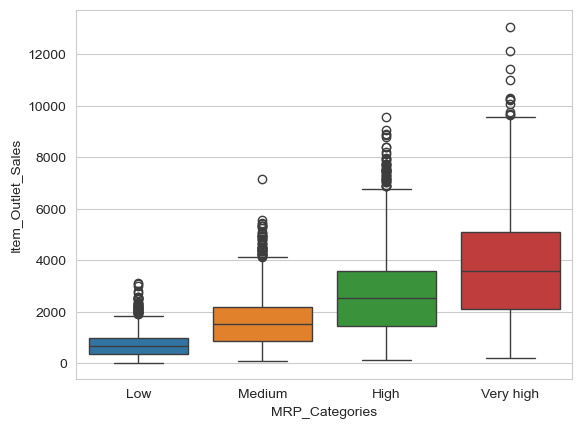

In [86]:
# Boxplot to analyze how Item_Outlet_Sales varies across different MRP categories
sns.boxplot(data=df, x="MRP_Categories", y='Item_Outlet_Sales', hue = "MRP_Categories")
plt.show()

- Median sales is significantly different for each MRP Catgories and a positive correlation can be noted

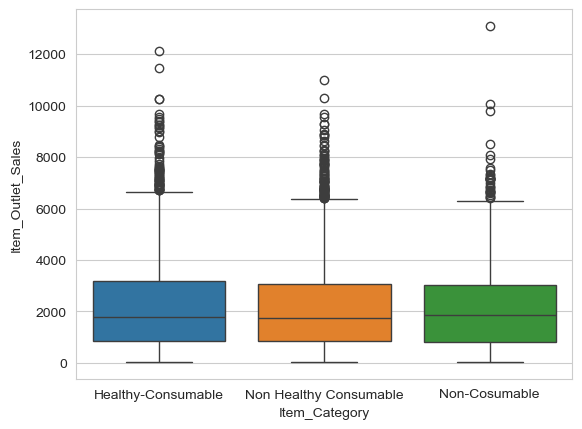

In [87]:
# Box plot showing sales distribution across item categories, colored by category
sns.boxplot(data=df, x='Item_Category', y='Item_Outlet_Sales', hue = "Item_Category")
plt.show()

### **Multivariate Analysis : Studying multiple columns at a time**

In [54]:
# Create a headtmap displaying the correlation factors of all numnerical columns

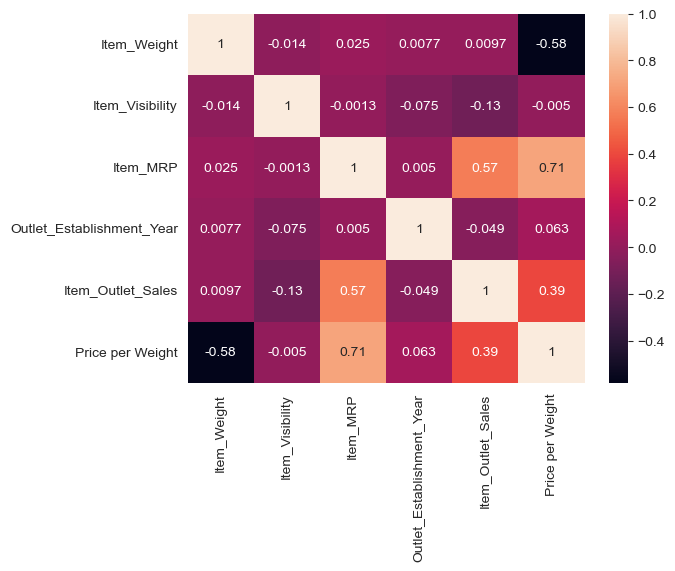

In [55]:
sns.heatmap(data=df.corr(numeric_only = True), annot=True)
plt.show()

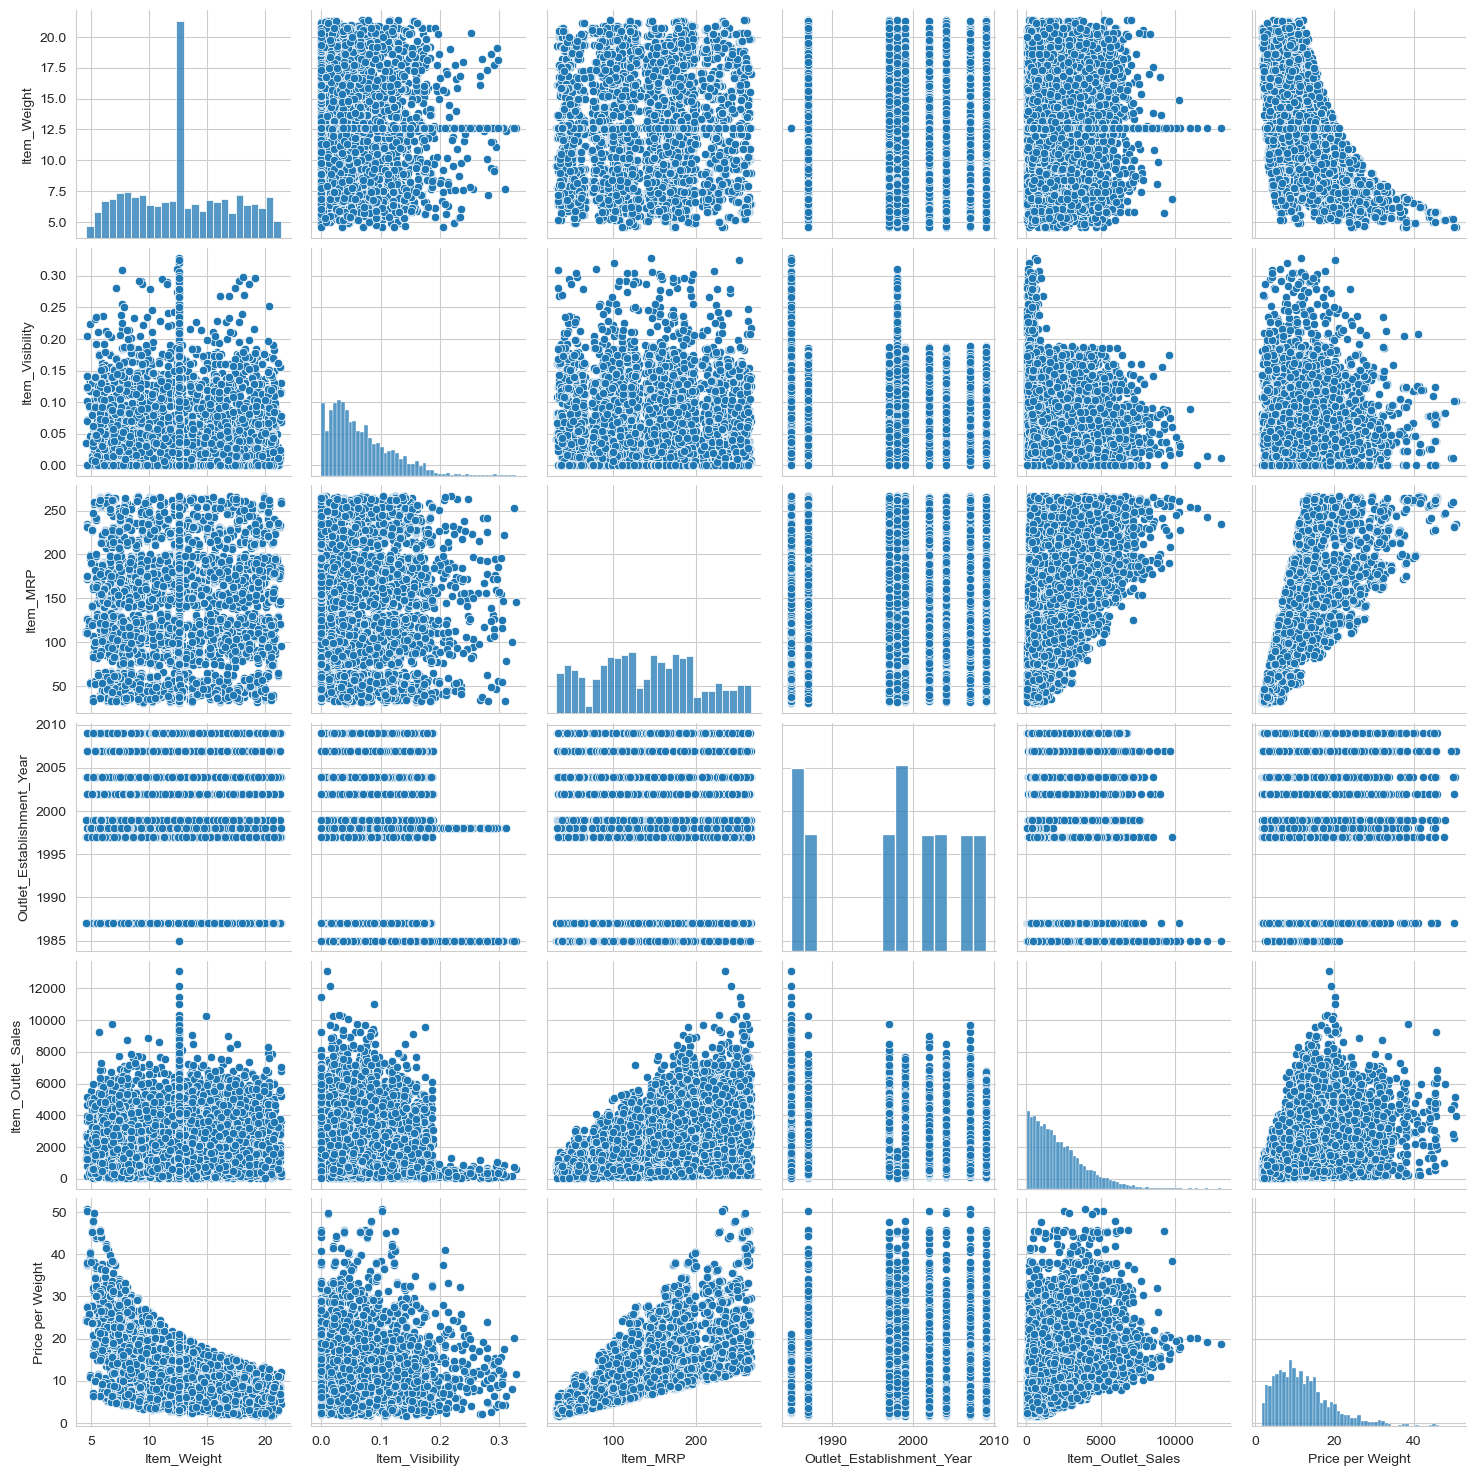

In [88]:
# Pair plot to visualize relationships and distributions among all numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
sns.pairplot(df[numeric_cols])
plt.show()

- **Item_MRP and Item_Outlet_Sales**  
  As the MRP (price) of items increases, the sales also increase. There is a strong positive relationship between these two.

- **Item_Visibility and Item_Outlet_Sales**  
  There is no clear pattern. Even with higher visibility, it doesn’t always result in higher sales.

- **Item_Weight and Item_Outlet_Sales**  
  There is very little or no relationship. Both heavy and light items have similar sales.

- **Price per Weight and Item_Outlet_Sales**  
  As the price per weight increases, sales tend to increase slightly, but the trend is not very strong.

- **Outlet_Establishment_Year and Item_Outlet_Sales**  
  No clear pattern is visible, but some older outlets might show slightly different sales behavior.


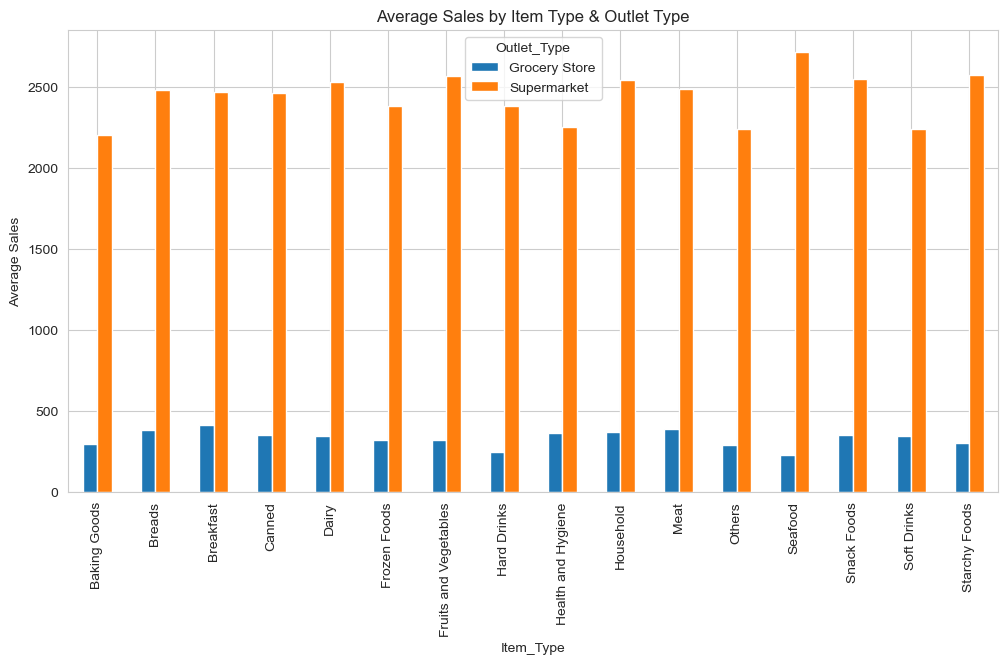

In [89]:
# Bar plot showing average sales for each item type across different outlet types
sales_group = df.groupby(['Item_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean().unstack()
sales_group.plot(kind='bar', figsize=(12,6))
plt.title("Average Sales by Item Type & Outlet Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.show()

1. **Supermarkets have much higher sales** than Grocery Stores for all item types.

2. **Seafood, Snack Foods and Starchy Foods** are the top-selling items in Supermarkets.

3. **Fruits & Vegetables, Health & Hygiene, and Meat** have the lowest sales even in Supermarkets.
